<a href="https://colab.research.google.com/github/faizanaliehsan/Applied_Data_science_Assigment2/blob/main/Brain_Tumor_Classification_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Required Modules

In [1]:
# To visualize the network in 3D
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 15.1 MB/s eta 0:00:00


In [2]:
import os                                    # Provides functions to interact with the operating system, such as reading and writing files
from glob import glob                        # Allows file pattern matching, useful for finding files with specific extensions or names

# Image processing libraries
from PIL import Image                        # Pillow library for image manipulation and processing (e.g., opening, transforming, and saving images)
import numpy as np                           # Fundamental package for scientific computing with Python, used for arrays and matrix operations

# Data manipulation and visualization libraries
import pandas as pd                          # Data manipulation and analysis library, useful for handling tabular data
import matplotlib.pyplot as plt              # Plotting library for creating static, animated, and interactive visualizations
import seaborn as sns                        # Statistical data visualization library based on matplotlib, useful for complex visualizations like heatmaps

# Machine learning libraries
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets, often used for preparing data for model training and evaluation
# Visualization library for displaying the architecture of neural networks.
import visualkeras                           # Visualization library to display neural network architectures in a simple and interpretable way

# Deep learning libraries
import tensorflow as tf                      # Open-source machine learning framework, provides tools for building and training machine learning models
# Importing Keras from TensorFlow for building and training neural networks
from tensorflow import keras                 # High-level neural networks API, integrated within TensorFlow
from tensorflow.keras.regularizers import l2  # Regularizers like L2 are used to prevent overfitting by penalizing large weights

# Importing Sequential model which is a linear stack of layers
from tensorflow.keras.models import Sequential  # Sequential model allows stacking layers linearly, which is suitable for most models

# Importing evaluation metrics from sklearn
from sklearn.metrics import confusion_matrix, classification_report  # Confusion matrix and classification report are used to evaluate model performance
from sklearn.metrics import roc_curve, auc, roc_auc_score             # ROC curve and AUC are used to evaluate binary or multi-class classification performance
from sklearn.preprocessing import label_binarize                     # Converts class labels to a binary matrix for multi-class ROC computation
from itertools import cycle                                          # Used for iterating over a set of items cyclically (e.g., for plotting multiple curves with different colors)

# Importing pre-trained models for transfer learning
from tensorflow.keras.applications import InceptionV3, VGG19          # Pre-trained deep learning models for transfer learning (e.g., InceptionV3, VGG19)

# Importing optimizers for training neural networks
from tensorflow.keras.optimizers import Adam, Adamax                  # Popular optimizers used to adjust the learning rate and update weights (e.g., Adam, Adamax)

# Importing various types of layers used in neural networks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Common layers for building CNNs: Convolutional, Pooling, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler  # Callbacks to control training (e.g., EarlyStopping, LR scheduler)

from tensorflow.keras.layers import BatchNormalization                # Batch normalization layer helps in stabilizing and speeding up training by normalizing activations
from tensorflow.keras.utils import plot_model                         # Utility to plot a visual representation of the model architecture

# Data augmentation and preprocessing library for images
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generates batches of tensor image data with real-time data augmentation, useful for training deep learning models

# Suppress warnings
import warnings                              # Provides a way to manage warnings in Python
warnings.filterwarnings("ignore")            # Ignore all warnings to prevent clutter in the output (useful during training or when running code in Jupyter notebooks)


# Importing the Images from Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def generate_dataframe_from_directory(directory_path):
    """
    Generates a DataFrame containing the class labels and corresponding image paths from the given directory.

    Parameters:
    directory_path (str): Path to the directory containing subdirectories of images, where each subdirectory is named after its class label.

    Returns:
    pd.DataFrame: A DataFrame with two columns - 'Image Path' and 'Class Label'.
    """
    class_labels, image_paths = zip(*[
        (class_name, os.path.join(directory_path, class_name, image_name))
        for class_name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, class_name))
        for image_name in os.listdir(os.path.join(directory_path, class_name))
    ])

    dataframe = pd.DataFrame({'Image Path': image_paths, 'Class Label': class_labels})
    return dataframe

def generate_test_dataframe(test_directory_path):
    """
    Generates a DataFrame containing the class labels and corresponding image paths from the given test directory.

    Parameters:
    test_directory_path (str): Path to the directory containing subdirectories of images, where each subdirectory is named after its class label.

    Returns:
    pd.DataFrame: A DataFrame with two columns - 'Image Path' and 'Class Label'.
    """
    class_labels, image_paths = zip(*[
        (class_name, os.path.join(test_directory_path, class_name, image_name))
        for class_name in os.listdir(test_directory_path) if os.path.isdir(os.path.join(test_directory_path, class_name))
        for image_name in os.listdir(os.path.join(test_directory_path, class_name))
    ])

    dataframe = pd.DataFrame({'Image Path': image_paths, 'Class Label': class_labels})
    return dataframe

# Importing Training Images

In [6]:
train_df = generate_dataframe_from_directory('/content/drive/MyDrive/MRI Brain Tumor Image Classification /Training')

In [7]:
train_df

Image Path Class Label
0     /content/drive/MyDrive/MRI Brain Tumor Image C...     notumor
1     /content/drive/MyDrive/MRI Brain Tumor Image C...     notumor
2     /content/drive/MyDrive/MRI Brain Tumor Image C...     notumor
3     /content/drive/MyDrive/MRI Brain Tumor Image C...     notumor
4     /content/drive/MyDrive/MRI Brain Tumor Image C...     notumor
...                                                 ...         ...
5707  /content/drive/MyDrive/MRI Brain Tumor Image C...      glioma
5708  /content/drive/MyDrive/MRI Brain Tumor Image C...      glioma
5709  /content/drive/MyDrive/MRI Brain Tumor Image C...      glioma
5710  /content/drive/MyDrive/MRI Brain Tumor Image C...      glioma
5711  /content/drive/MyDrive/MRI Brain Tumor Image C...      glioma

[5712 rows x 2 columns]

# Importing the Test Images

In [8]:
test_df = generate_test_dataframe('/content/drive/MyDrive/MRI Brain Tumor Image Classification /Testing')

In [9]:
test_df

Image Path Class Label
0     /content/drive/MyDrive/MRI Brain Tumor Image C...   pituitary
1     /content/drive/MyDrive/MRI Brain Tumor Image C...   pituitary
2     /content/drive/MyDrive/MRI Brain Tumor Image C...   pituitary
3     /content/drive/MyDrive/MRI Brain Tumor Image C...   pituitary
4     /content/drive/MyDrive/MRI Brain Tumor Image C...   pituitary
...                                                 ...         ...
1306  /content/drive/MyDrive/MRI Brain Tumor Image C...      glioma
1307  /content/drive/MyDrive/MRI Brain Tumor Image C...      glioma
1308  /content/drive/MyDrive/MRI Brain Tumor Image C...      glioma
1309  /content/drive/MyDrive/MRI Brain Tumor Image C...      glioma
1310  /content/drive/MyDrive/MRI Brain Tumor Image C...      glioma

[1311 rows x 2 columns]

# Distribution of Classes in Training and Test Set

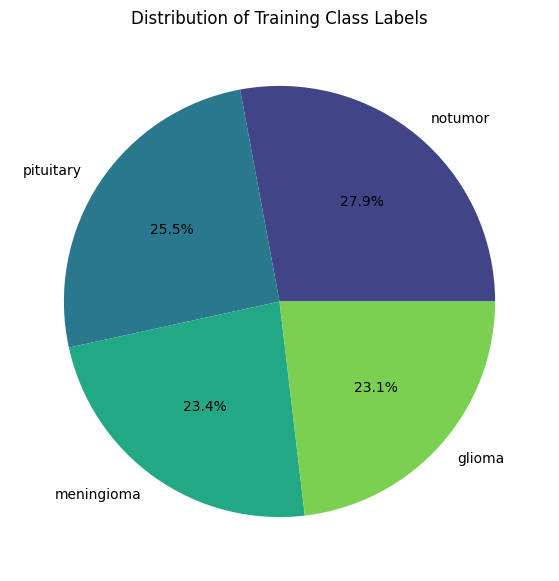

In [ ]:
# Count the occurrences of each class label
class_counts = train_df['Class Label'].value_counts()

# Define a color palette with different colors
colors = sns.color_palette('viridis', len(class_counts))

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Training Class Labels')
plt.show()

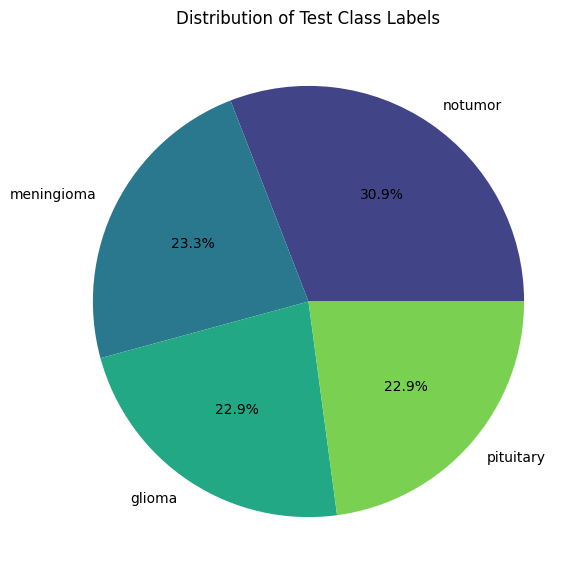

In [ ]:
# Count the occurrences of each class label
class_counts = test_df['Class Label'].value_counts()

# Define a color palette with different colors
colors = sns.color_palette('viridis', len(class_counts))

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Test Class Labels')
plt.show()

# Data Preprocessing

**Images before preprocessing**

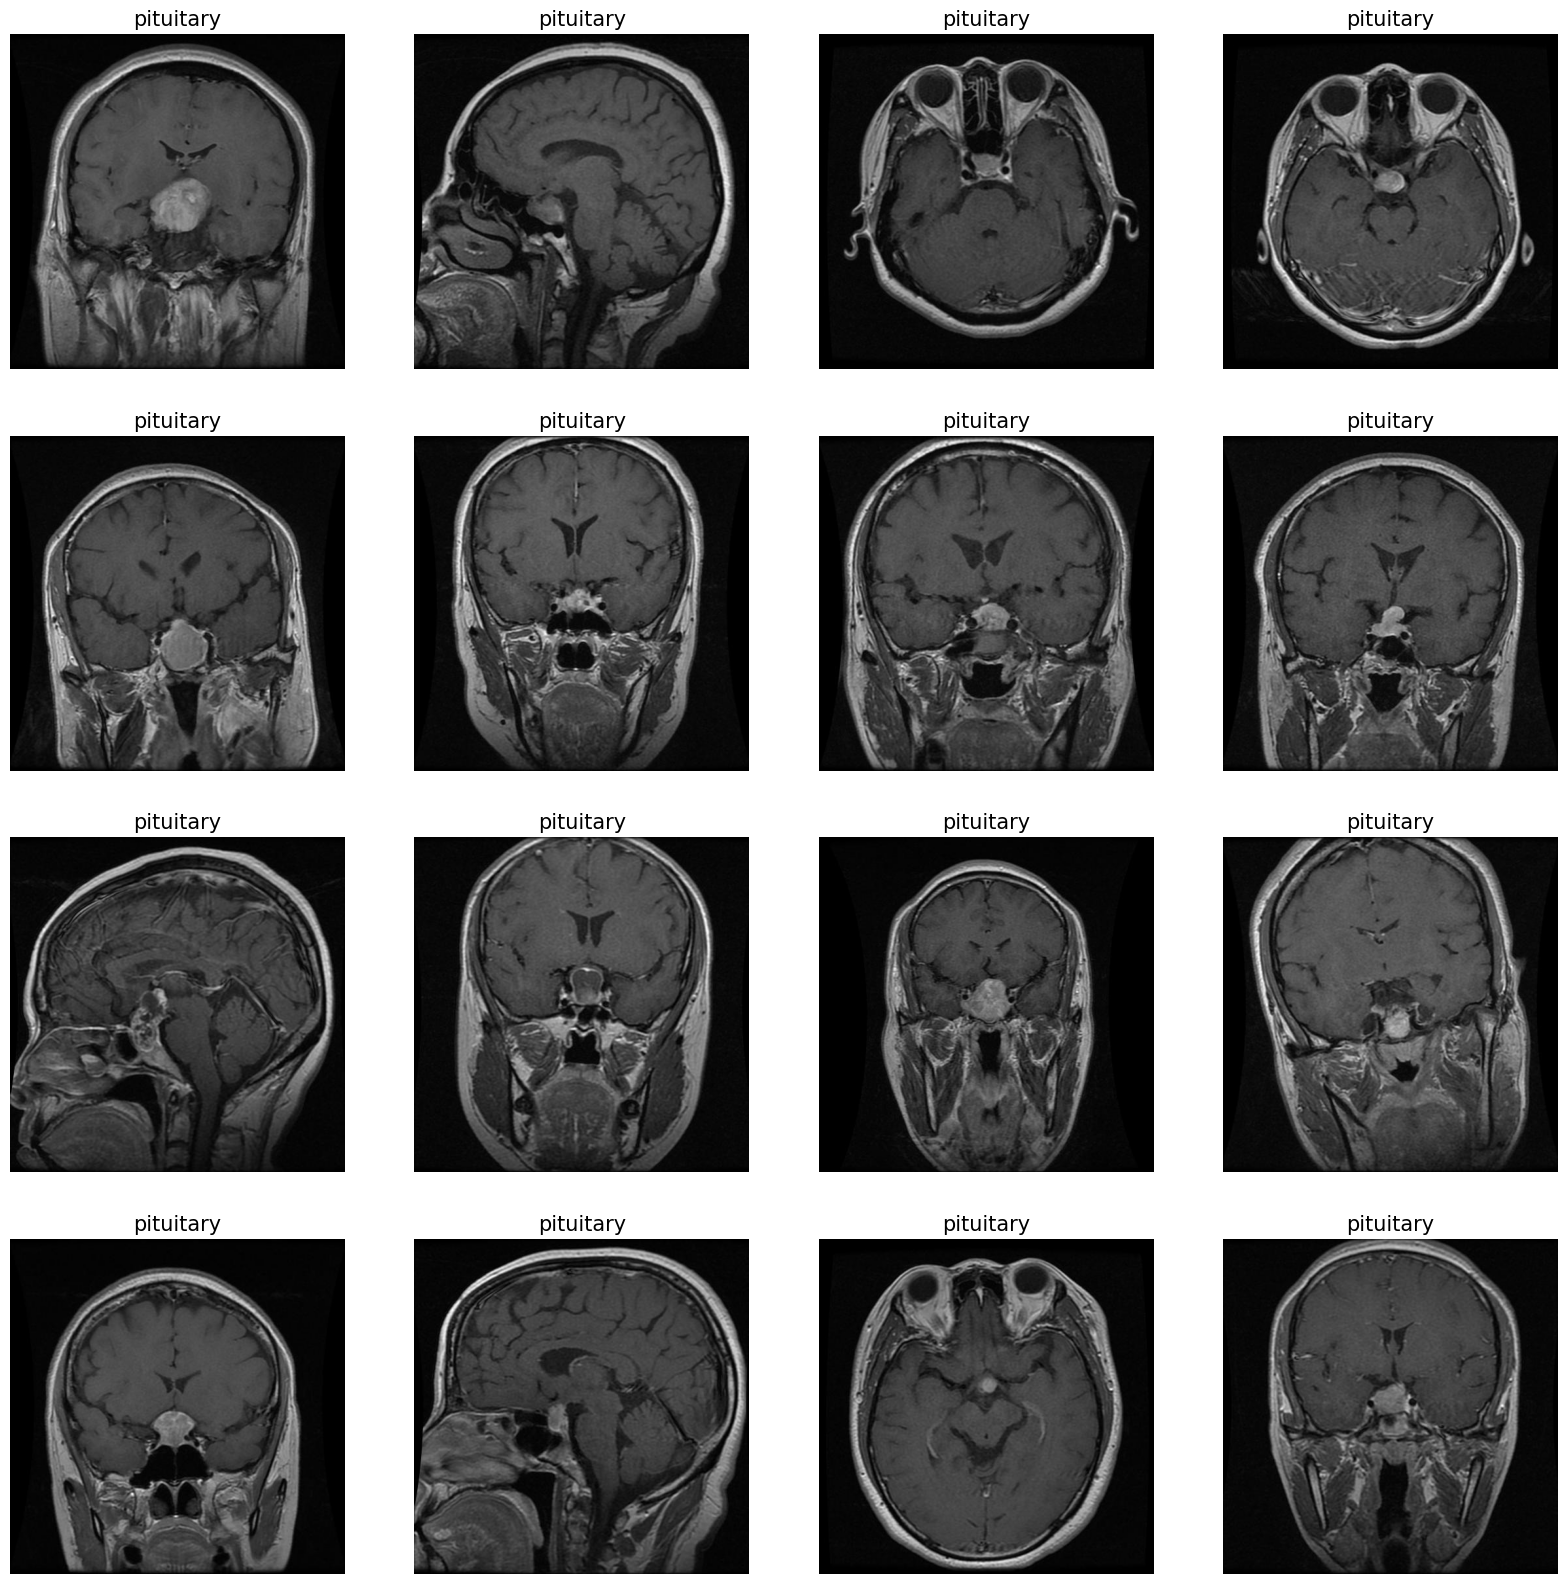

In [ ]:
# Number of images to display
num_images = 16

# Set the figure size for the plot
plt.figure(figsize=(20, 20))

# Iterate over the images and their corresponding labels
for i in range(num_images):
    # Read image path and label from DataFrame
    image_path = train_df.loc[i, 'Image Path']
    label = train_df.loc[i, 'Class Label']

    # Load the image
    image = Image.open(image_path)

    # Create a subplot in a 4x4 grid
    plt.subplot(4, 4, i + 1)

    # Display the image
    plt.imshow(image)

    # Set the title of the subplot to the class name
    plt.title(label, color='k', fontsize=15)
    plt.axis('off')  # Hide the axes

# Display the figure with all subplots
plt.show()

**Spliting the data into Validation and Test set**

In [ ]:
valid_df, test_df = train_test_split(test_df, train_size=0.5, random_state=20, stratify=test_df['Class Label'])

**Applying Data Augmentation and Preprocssing Steps**

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


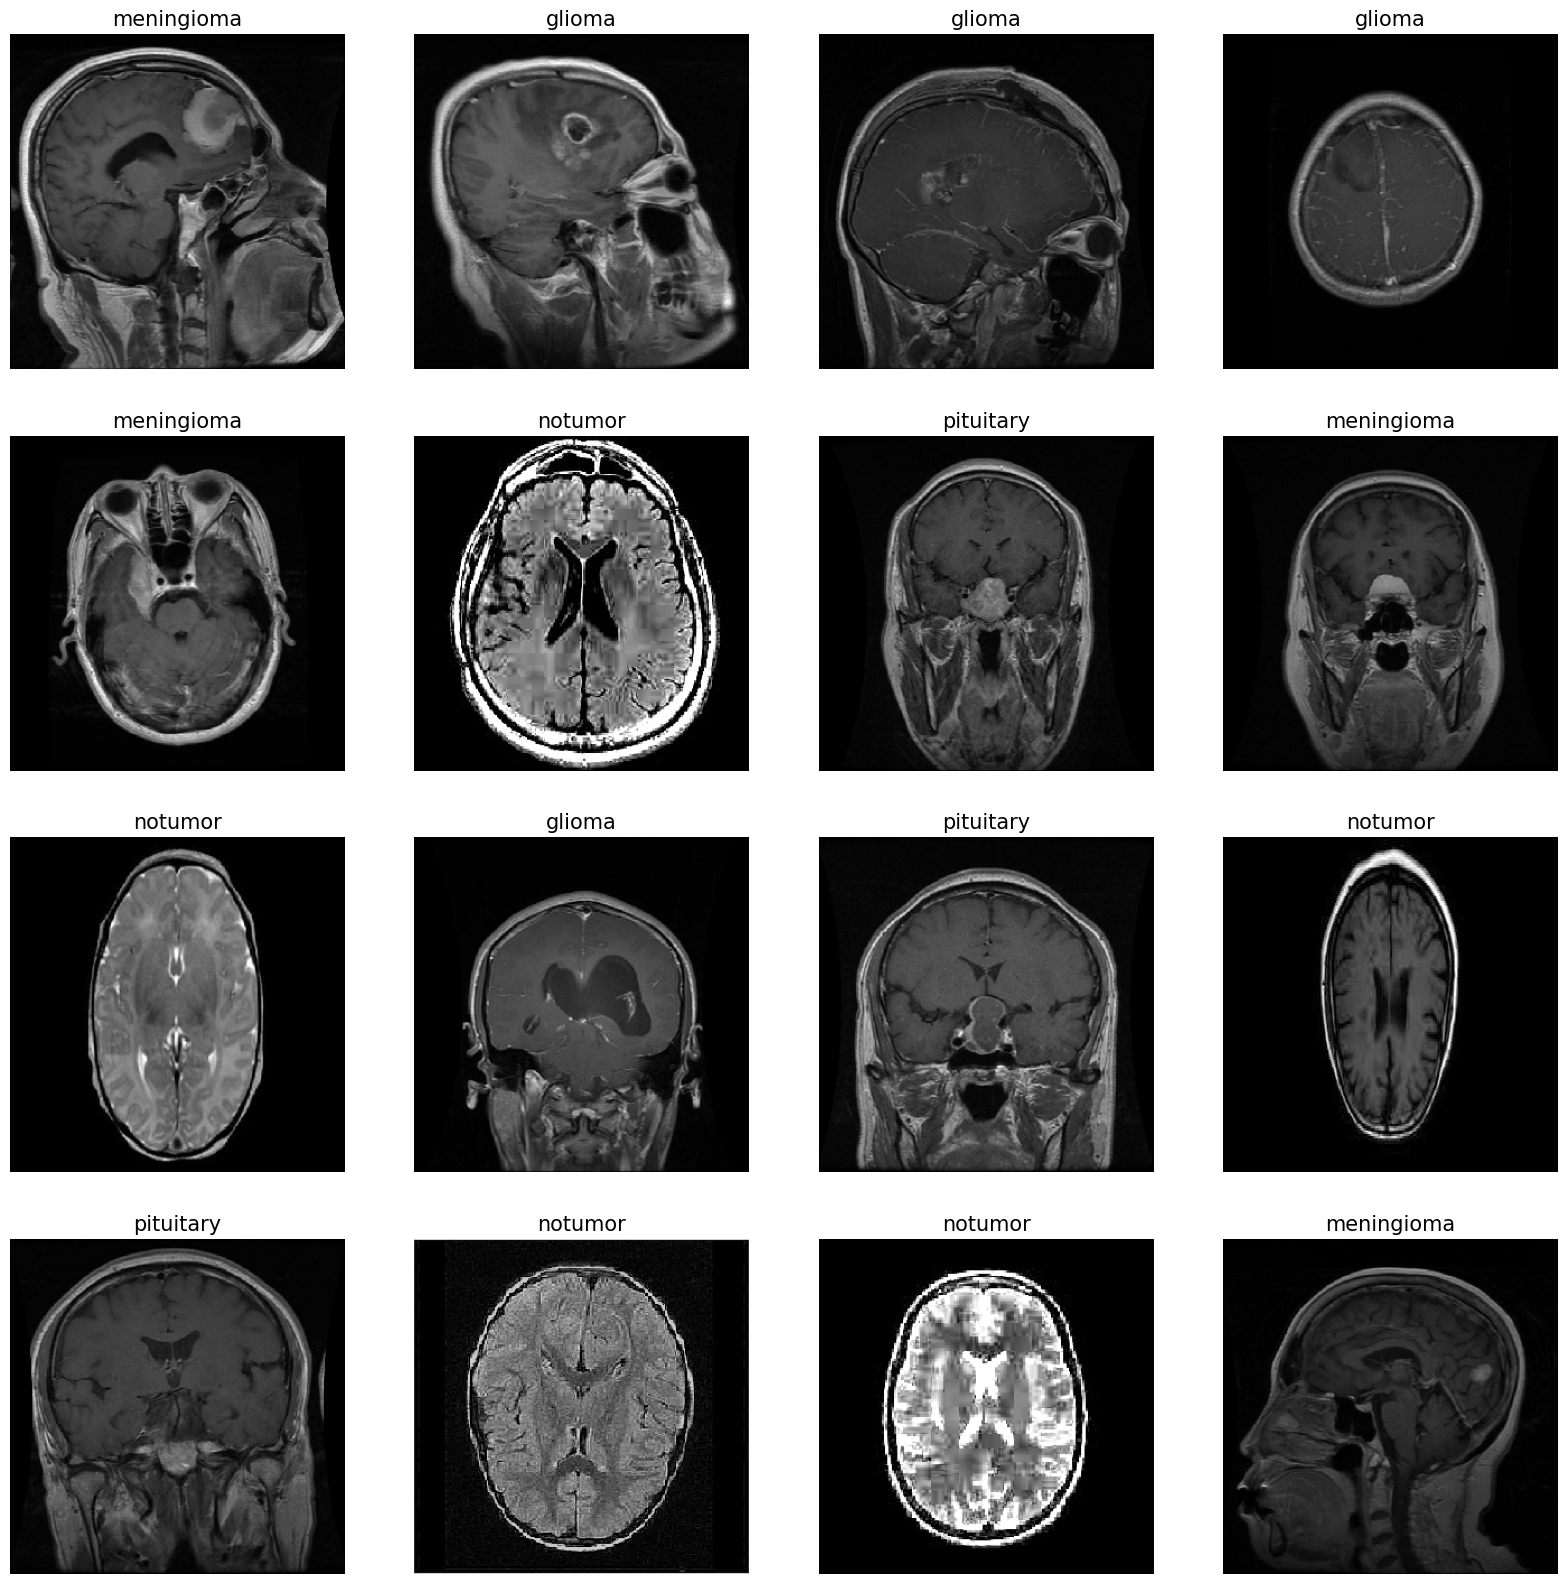

In [ ]:
# Parameters
batch_size = 32
img_size = (299, 299)
brightness_range = (0.8, 1.2)
rescale_factor = 1/255

# Define data augmentation parameters for training
train_data_gen_args = dict(
    rescale=rescale_factor,
    brightness_range=brightness_range
)

# Define data augmentation parameters for validation and testing (usually less augmentation)
valid_test_data_gen_args = dict(rescale=rescale_factor)

# Create ImageDataGenerators with parameters
train_val_gen = ImageDataGenerator(**train_data_gen_args)
valid_test_gen = ImageDataGenerator(**valid_test_data_gen_args)

# Function to create generators from dataframes
def create_generators(tr_df, valid_df, ts_df, batch_size, img_size):
    if tr_df.empty or valid_df.empty or ts_df.empty:
        raise ValueError("One of the dataframes is empty. Please check your dataframes.")

    train_gen = train_val_gen.flow_from_dataframe(
        tr_df,
        x_col='Image Path',
        y_col='Class Label',
        batch_size=batch_size,
        target_size=img_size,
        class_mode='categorical'  # Assuming you have categorical labels
    )

    valid_gen = valid_test_gen.flow_from_dataframe(
        valid_df,
        x_col='Image Path',
        y_col='Class Label',
        batch_size=batch_size,
        target_size=img_size,
        class_mode='categorical'
    )

    test_gen_flow = valid_test_gen.flow_from_dataframe(
        ts_df,
        x_col='Image Path',
        y_col='Class Label',
        batch_size=16,
        target_size=img_size,
        class_mode='categorical',
        shuffle=False
    )

    return train_gen, valid_gen, test_gen_flow

# Assuming tr_df, valid_df, ts_df are defined and not empty
train_data_gen, valid_data_gen, test_data_gen_flow = create_generators(train_df, valid_df, test_df, batch_size, img_size)

# Visualize some augmented images from the training generator
images, labels = next(train_data_gen)
class_names = list(train_data_gen.class_indices.keys())

plt.figure(figsize=(20, 20))
for i in range(min(len(images), 16)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    class_name = class_names[np.argmax(labels[i])]
    plt.title(class_name, color='k', fontsize=15)
    plt.axis('off')
plt.show()

# CNN Model Design

In [ ]:
# Create Model Structure
image_shape = (299, 299)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

model = Sequential([

    # Block 1
    Conv2D(32, (4, 4), activation="relu", padding='same', input_shape=(image_shape[0], image_shape[1], channels), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), padding='same'),
    Dropout(0.1),

    # Block 2
    Conv2D(64, (4, 4), activation="relu", padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(64, (4, 4), activation="relu", padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), padding='same'),

    # Block 3
    Conv2D(128, (4, 4), activation="relu", padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (4, 4), activation="relu", padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), padding='same'),
    Dropout(0.1),

    # Block 4
    Conv2D(256, (4, 4), activation="relu", padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(256, (4, 4), activation="relu", padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), padding='same'),
    Dropout(0.1),

    Conv2D(512, (4, 4), activation="relu", padding='same', kernel_regularizer=l2(0.002)),
    BatchNormalization(),
    Conv2D(512, (4, 4), activation="relu", padding='same', kernel_regularizer=l2(0.02)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), padding='same'),
    Dropout(0.1),
    Flatten(),
    # Fully connected layers
    Dense(512, activation="relu", kernel_regularizer=l2(0.002)),
    Dropout(0.5),
    Dense(256, activation="relu", kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(4, activation="softmax")
])


# Model Compilation

In [ ]:
model.summary()
# Optimizer
optimizer = Adamax(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 299, 299, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 299, 299, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 64)        │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100, 100, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 100, 100, 64)        │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100, 100, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 34, 34, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 34, 34, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 256)         │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 256)         │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 9,548,580 (36.42 MB)

 Trainable params: 9,544,676 (36.41 MB)

 Non-trainable params: 3,904 (15.25 KB)

In [ ]:
# Learning Rate Scheduler with Warm-up
def scheduler(epoch, lr):
    if epoch < 10:  # Warm-up phase for the first 10 epochs
        return lr
    else:
        # Decay the learning rate using a simple float operation
        return float(lr * 0.9)  # Exponential decay by reducing 10% each epoch after warm-up

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)


# Callbacks
model_es = EarlyStopping(monitor='val_loss', min_delta=1e-9, patience=10, verbose=1, restore_best_weights=True)
model_rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1, min_lr=1e-7)

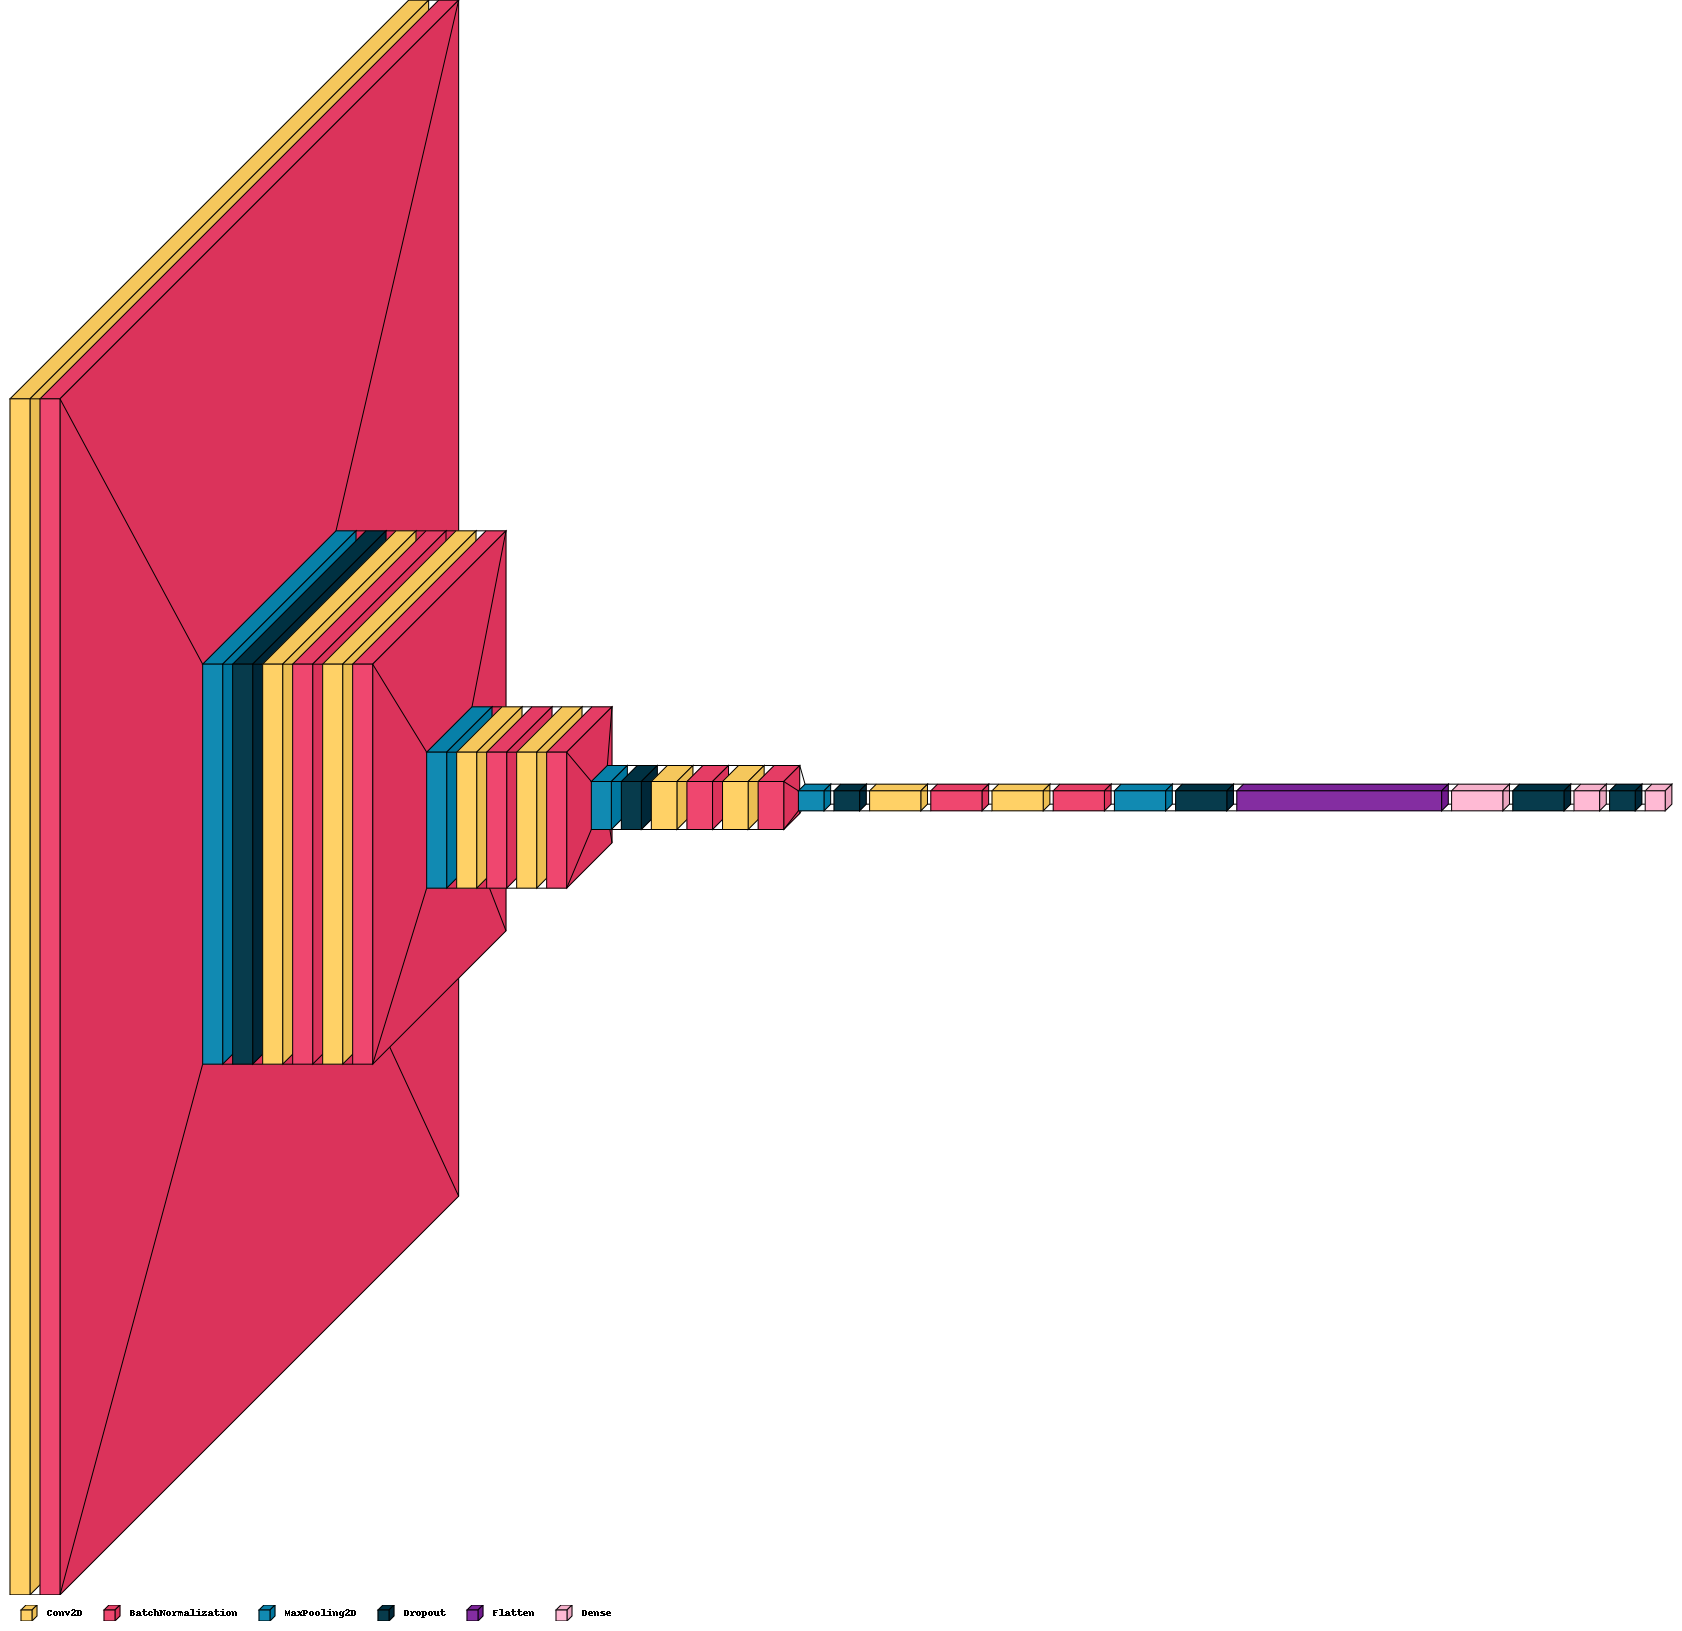

In [ ]:
# Let's visualize the model
visualkeras.layered_view(model,legend=True)

# Training CNN

In [ ]:
epochs = 40   # number of all epochs in training
history = model.fit(train_data_gen,
                    epochs=epochs,
                    verbose=1,
                    validation_data=valid_data_gen,
                    callbacks=[model_es, model_rlr, lr_scheduler],
                    shuffle=False)

Epoch 1/40
179/179 ━━━━━━━━━━━━━━━━━━━━ 1489s 8s/step - accuracy: 0.5193 - loss: 14.0772 - val_accuracy: 0.2290 - val_loss: 11.5471 - learning_rate: 0.0010
Epoch 2/40
179/179 ━━━━━━━━━━━━━━━━━━━━ 56s 313ms/step - accuracy: 0.7570 - loss: 8.6947 - val_accuracy: 0.4031 - val_loss: 7.5703 - learning_rate: 0.0010
Epoch 3/40
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 296ms/step - accuracy: 0.8373 - loss: 6.2024 - val_accuracy: 0.4870 - val_loss: 6.7548 - learning_rate: 0.0010
Epoch 4/40
179/179 ━━━━━━━━━━━━━━━━━━━━ 55s 307ms/step - accuracy: 0.8547 - loss: 4.8207 - val_accuracy: 0.6260 - val_loss: 4.7296 - learning_rate: 0.0010
Epoch 5/40
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 296ms/step - accuracy: 0.8922 - loss: 3.9108 - val_accuracy: 0.6443 - val_loss: 3.9581 - learning_rate: 0.0010
Epoch 6/40
179/179 ━━━━━━━━━━━━━━━━━━━━ 54s 300ms/step - accuracy: 0.8919 - loss: 3.3884 - val_accuracy: 0.8275 - val_loss: 3.1885 - learning_rate: 0.0010
Epoch 7/40
179/179 ━━━━━━━━━━━━━━━━━━━━ 54s 303ms/step - accuracy: 0.

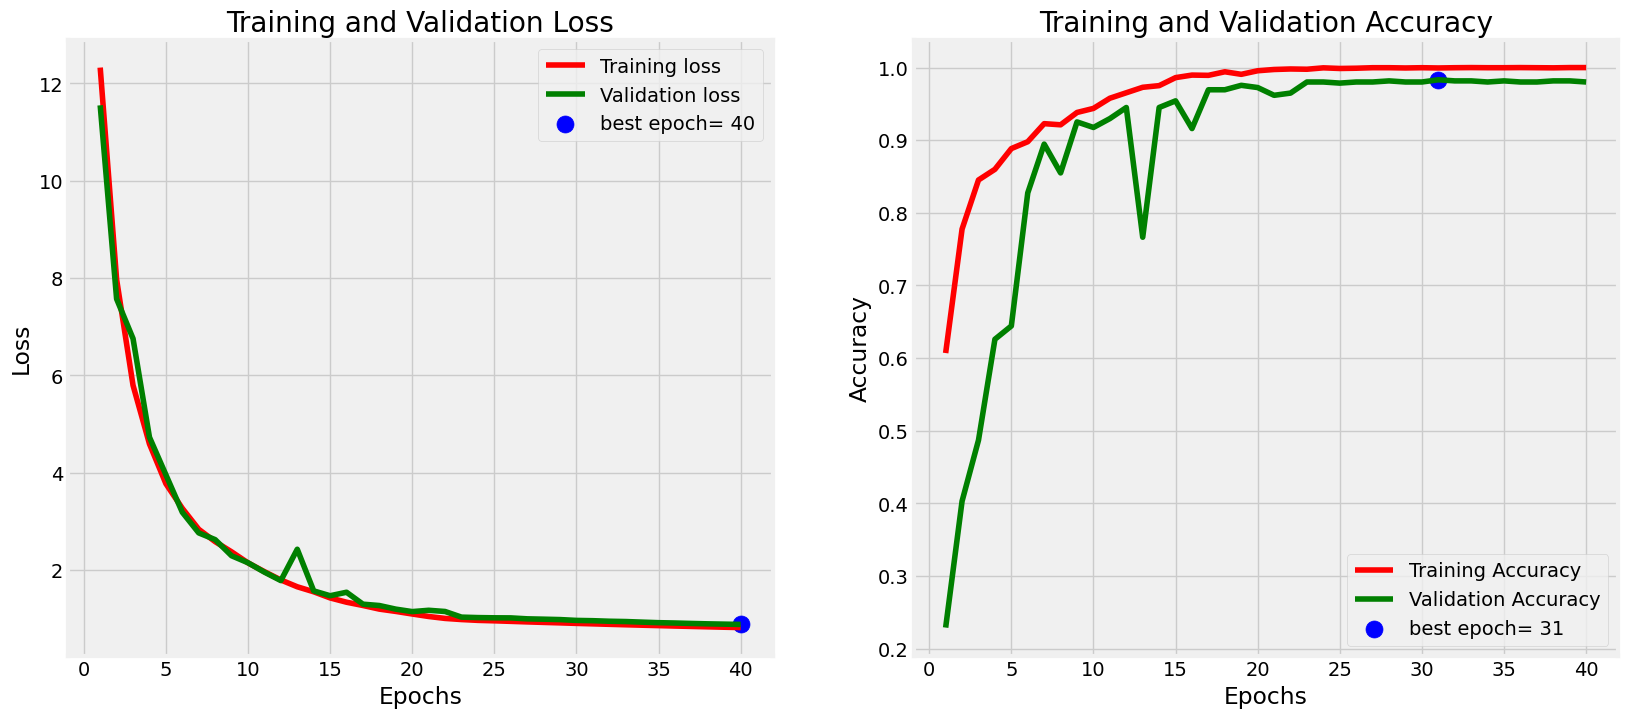

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()


In [ ]:
train_results = model.evaluate(train_data_gen, verbose=1)
validation_results = model.evaluate(valid_data_gen, verbose=1)

print("Train Loss: ", train_results[0])
print("Train Accuracy: ", train_results[1])
print('-' * 20)
print("Validation Loss: ", validation_results[0])
print("Validation Accuracy: ", validation_results[1])
print('-' * 20)
print("Test Loss: ", test_results[0])
print("Test Accuracy: ", test_results[1])

179/179 ━━━━━━━━━━━━━━━━━━━━ 49s 274ms/step - accuracy: 1.0000 - loss: 0.8157
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - accuracy: 0.9800 - loss: 0.8716
41/41 ━━━━━━━━━━━━━━━━━━━━ 211s 5s/step - accuracy: 0.9797 - loss: 0.9198
Train Loss:  0.8156639933586121
Train Accuracy:  1.0
--------------------
Validation Loss:  0.8839918971061707
Validation Accuracy:  0.9801526665687561
--------------------
Test Loss:  0.8615923523902893
Test Accuracy:  0.9862805008888245


# Confusion Matrix

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step


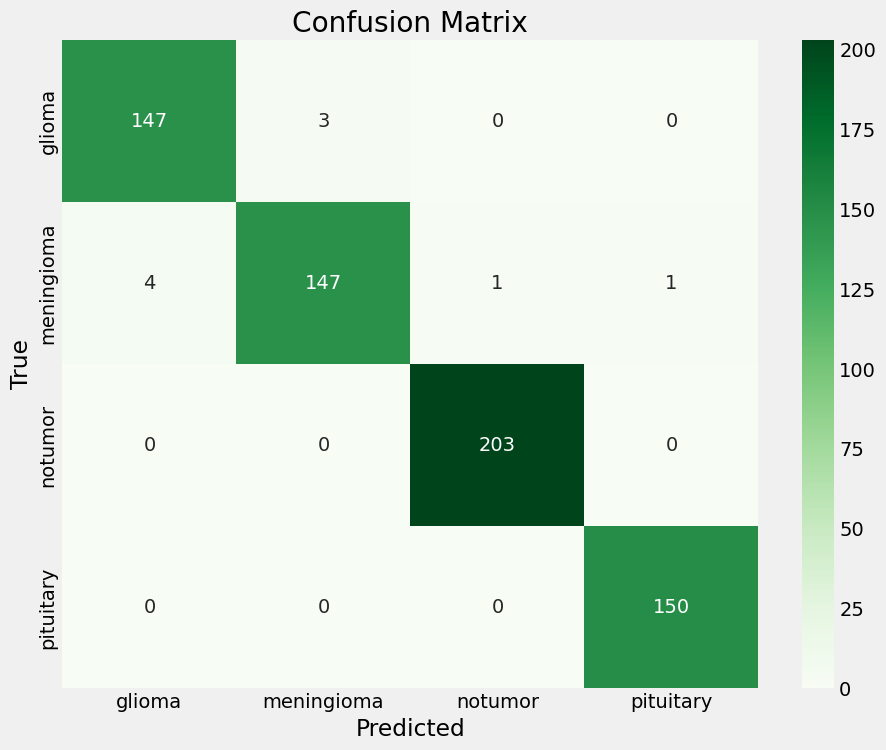

              precision    recall  f1-score   support

      glioma       0.97      0.98      0.98       150
  meningioma       0.98      0.96      0.97       153
     notumor       1.00      1.00      1.00       203
   pituitary       0.99      1.00      1.00       150

    accuracy                           0.99       656
   macro avg       0.99      0.99      0.99       656
weighted avg       0.99      0.99      0.99       656



In [ ]:
# Function to plot the confusion matrix with a different color map
def plot_confusion_matrix(true_classes, pred_classes, class_names, cmap='Greens'):
    # Generate confusion matrix
    cm = confusion_matrix(true_classes, pred_classes)

    # Set up the plot
    plt.figure(figsize=(10, 8))

    # Use seaborn to create a heatmap visualization of the confusion matrix with the chosen colormap
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
                xticklabels=class_names, yticklabels=class_names)

    # Labeling the plot
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

    # Show the plot
    plt.show()

# Get the class names from the test generator's class indices
class_names = list(test_data_gen_flow.class_indices.keys())
test_true_classes = test_data_gen_flow.classes
# Predict on the test set
test_pred = model.predict(test_data_gen_flow)
test_pred_classes = np.argmax(test_pred, axis=1)

# Plot the confusion matrix with the new color map
plot_confusion_matrix(test_true_classes, test_pred_classes, class_names, cmap='Greens')

# Print the classification report
print(classification_report(test_true_classes, test_pred_classes, target_names=class_names))

# ROC Curves

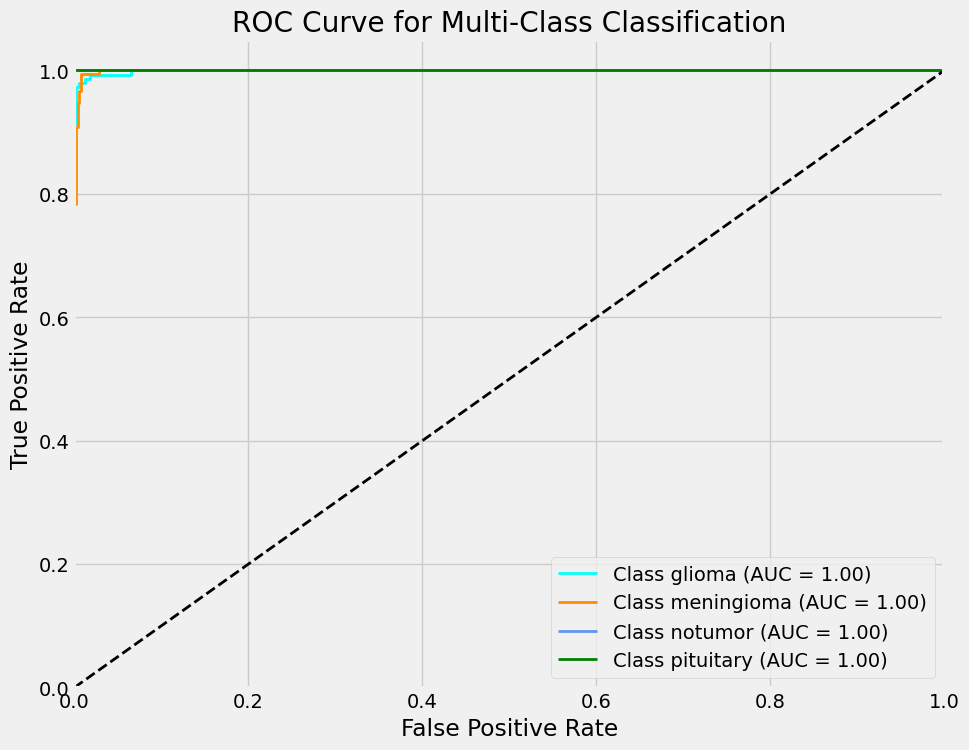

In [ ]:
# Binarize the true classes
n_classes = len(class_names)
true_classes_binarized = label_binarize(test_true_classes, classes=[i for i in range(n_classes)])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_classes_binarized[:, i], test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (random guess)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

# Saving the Model

In [ ]:
model.save('/content/drive/MyDrive/CNN_Best_Model.h5')

# Transfer Learning (InceptionV3)

In [ ]:
# Define input shape
img_shape = (299, 299, 3)  # Adjust according to your image data

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=img_shape)

# Freeze all layers initially
for layer in inception_base.layers:
    layer.trainable = False

# Transfer Learning Model Defination

In [ ]:
# Build the model
tr_model = Sequential([
    inception_base,
    Flatten(),
    # Fully connected layers
    Dense(512, activation="relu", kernel_regularizer=l2(0.002)),
    Dropout(0.5),
    Dense(256, activation="relu", kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(4, activation="softmax")
])


# Model Compilation

In [ ]:
# Compile the model
tr_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Learning rate schedule

In [ ]:
# Learning rate warm-up schedule
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr * (epoch + 1) / 5
    return lr

lr_schedule = LearningRateScheduler(lr_scheduler)

# Model Training

In [ ]:
history_fine = tr_model.fit(train_data_gen, epochs=30, verbose=1, validation_data=valid_data_gen, shuffle=False,
                         callbacks=[early_stopping, lr_schedule])

Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 1613s 9s/step - accuracy: 0.6189 - loss: 4.9388 - val_accuracy: 0.8351 - val_loss: 2.3966 - learning_rate: 2.0000e-04
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 109s 362ms/step - accuracy: 0.8292 - loss: 2.4014 - val_accuracy: 0.8504 - val_loss: 2.2695 - learning_rate: 8.0000e-05
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 320ms/step - accuracy: 0.8645 - loss: 2.2566 - val_accuracy: 0.8718 - val_loss: 2.1916 - learning_rate: 4.8000e-05
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 318ms/step - accuracy: 0.8804 - loss: 2.1716 - val_accuracy: 0.8718 - val_loss: 2.1457 - learning_rate: 3.8400e-05
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 321ms/step - accuracy: 0.8787 - loss: 2.1298 - val_accuracy: 0.8809 - val_loss: 2.0892 - learning_rate: 3.8400e-05
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 58s 323ms/step - accuracy: 0.8938 - loss: 2.0591 - val_accuracy: 0.8916 - val_loss: 2.0263 - learning_rate: 3.8400e-05
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 31

# Model Curves

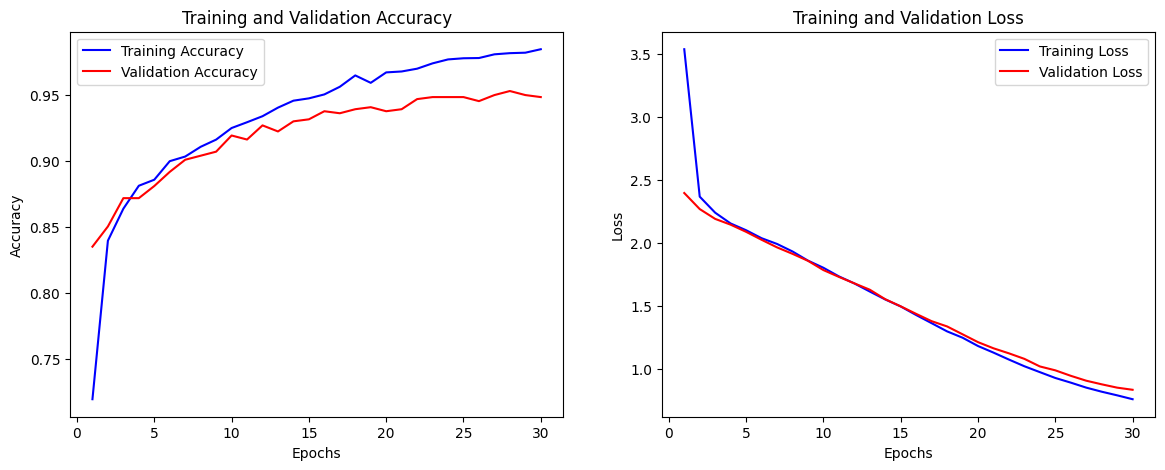

In [ ]:
# Function to plot the training history
def plot_model_performance(training_history):
    train_acc = training_history.history['accuracy']
    val_acc = training_history.history['val_accuracy']
    train_loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']
    epochs_range = range(1, len(train_acc) + 1)

    plt.figure(figsize=(14, 5))

    # Plotting Training and Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc, 'b', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting Training and Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_loss, 'b', label='Training Loss')
    plt.plot(epochs_range, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


# Plot the fine-tuning history using the new function
plot_model_performance(history_fine)

# Model Evaluation on Test Set

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = tr_model.evaluate(test_data_gen_flow , verbose=1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

41/41 ━━━━━━━━━━━━━━━━━━━━ 201s 5s/step - accuracy: 0.9650 - loss: 0.8095
Test Loss: 0.8156775236129761
Test Accuracy: 0.9634146094322205


# Confusion Matix for TR Model

41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step


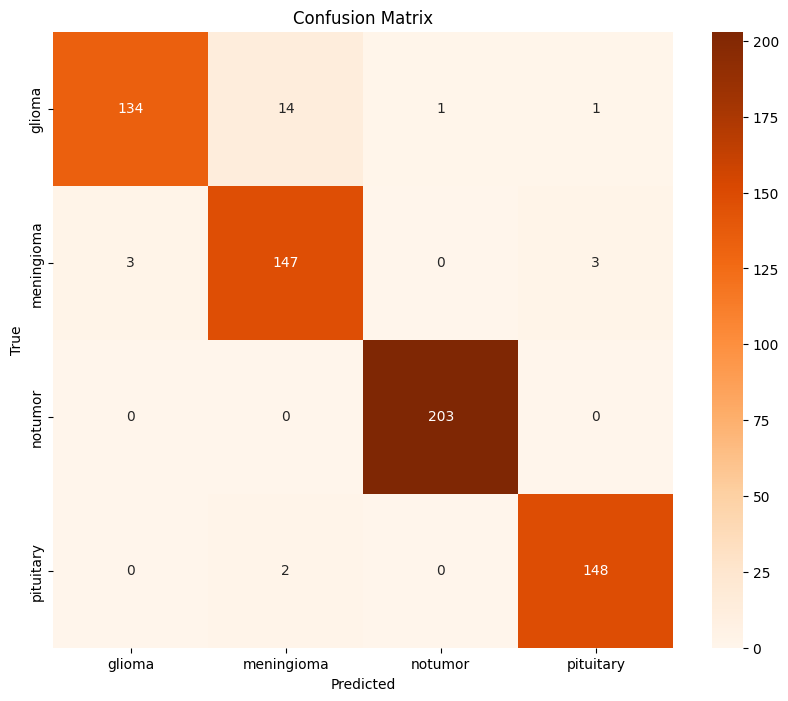

              precision    recall  f1-score   support

      glioma       0.98      0.89      0.93       150
  meningioma       0.90      0.96      0.93       153
     notumor       1.00      1.00      1.00       203
   pituitary       0.97      0.99      0.98       150

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



In [ ]:
# Predict on the test set
test_predictions = tr_model.predict(test_data_gen_flow)
predicted_classes = np.argmax(test_predictions, axis=1)
true_classes = test_data_gen_flow.classes
# Function to plot the confusion matrix with updated names and a different color map
def display_confusion_matrix(actual_classes, predicted_classes, labels, cmap='Oranges'):
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(actual_classes, predicted_classes)

    # Set up the plot
    plt.figure(figsize=(10, 8))

    # Create a heatmap with the specified colormap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap,
                xticklabels=labels, yticklabels=labels)

    # Label the plot
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

    # Show the plot
    plt.show()

# Get the class names from the test generator's class indices
class_labels = list(test_data_gen_flow.class_indices.keys())

# Plot the confusion matrix with updated variable names and color map
display_confusion_matrix(true_classes, predicted_classes, class_labels, cmap='Oranges')

# Print the classification report with updated variable names
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# ROC CURVES

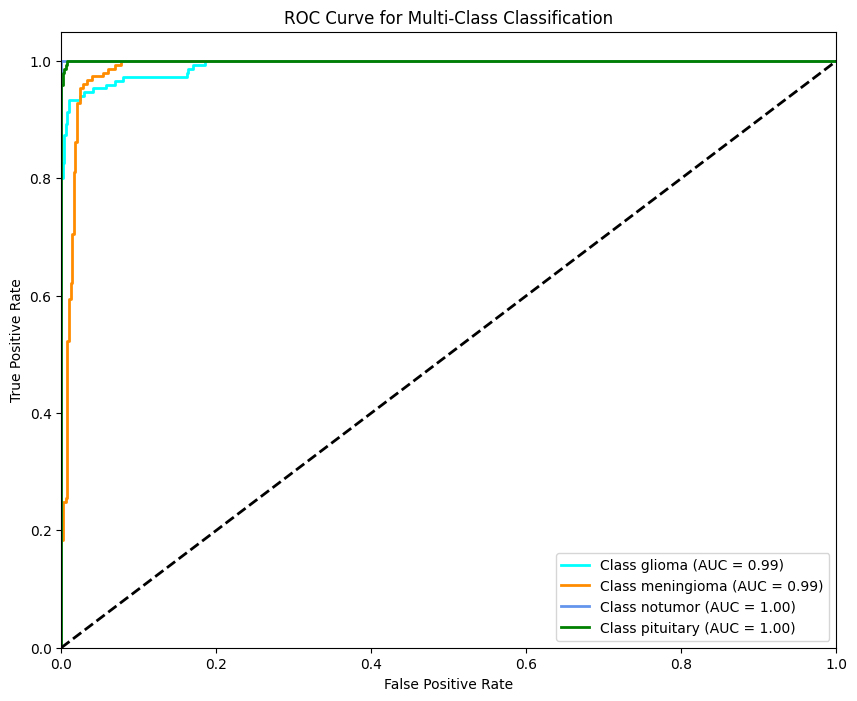

In [ ]:
# Binarize the true classes
n_classes = len(class_labels)
true_classes_binarized = label_binarize(true_classes, classes=[i for i in range(n_classes)])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_classes_binarized[:, i], test_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (random guess)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

# Saving the Model

In [ ]:
tr_model.save('/content/drive/MyDrive/TL_Best_Model.h5')

VGG19

In [ ]:
# Define input shape
img_shape = (299, 299, 3)  # Adjust according to VGG19 input size (224x224x3)

# Load the pre-trained VGG19 model without the top layers
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=img_shape)

# Unfreeze the last 3 layers
for layer in vgg19_base.layers[-1:]:
    layer.trainable = True

# Build the Model

In [ ]:
# Build the model
trained_model = Sequential([
    vgg19_base,
    Flatten(),
    # Fully connected layers
    Dense(512, activation="relu", kernel_regularizer=l2(0.002)),
    Dropout(0.5),
    Dense(256, activation="relu", kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(4, activation="softmax")
])

# Compiling Model

In [ ]:
# Compile the model
trained_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Learning rate warm-up schedule

In [ ]:
# Learning rate warm-up schedule
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr * (epoch + 1) / 5
    return lr

lr_schedule = LearningRateScheduler(lr_scheduler)

# Training Models

In [ ]:
# Train the model
history_fine = trained_model.fit(train_data_gen, epochs=30, verbose=1, validation_data=valid_data_gen, shuffle=False,
                                 callbacks=[early_stopping, lr_schedule])


Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.2688 - loss: 2.8732 - val_accuracy: 0.4137 - val_loss: 2.1525 - learning_rate: 2.0000e-04
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.4520 - loss: 2.0882 - val_accuracy: 0.5069 - val_loss: 1.9577 - learning_rate: 8.0000e-05
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.5704 - loss: 1.8078 - val_accuracy: 0.6519 - val_loss: 1.6997 - learning_rate: 4.8000e-05
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.6840 - loss: 1.5985 - val_accuracy: 0.6840 - val_loss: 1.5530 - learning_rate: 3.8400e-05
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.7009 - loss: 1.5244 - val_accuracy: 0.7466 - val_loss: 1.4466 - learning_rate: 3.8400e-05
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.7489 - loss: 1.3895 - val_accuracy: 0.7695 - val_loss: 1.3348 - learning_rate: 3.8400e-05
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - acc

# Learning Curves

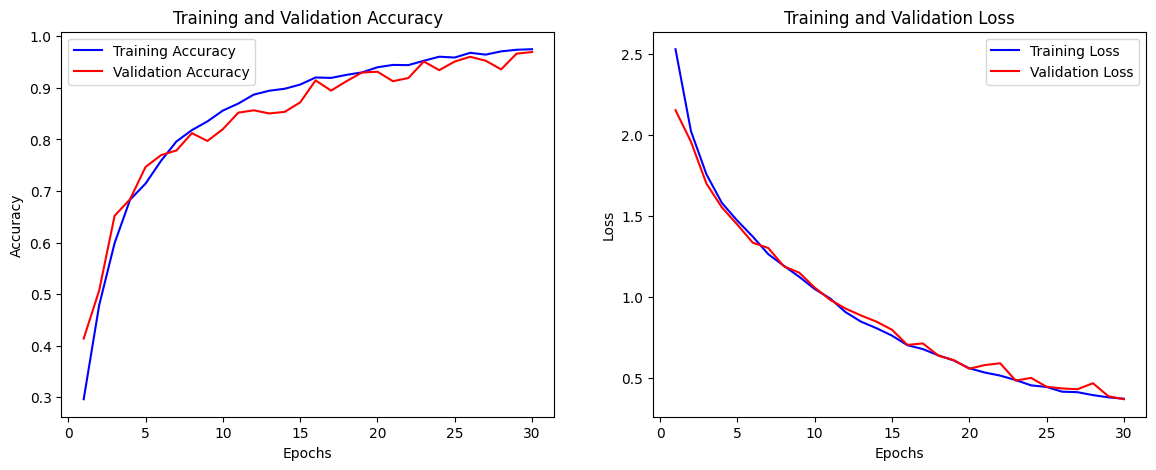

In [ ]:
# Function to plot the training history
def plot_model_performance(training_history):
    train_acc = training_history.history['accuracy']
    val_acc = training_history.history['val_accuracy']
    train_loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']
    epochs_range = range(1, len(train_acc) + 1)

    plt.figure(figsize=(14, 5))

    # Plotting Training and Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc, 'b', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting Training and Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_loss, 'b', label='Training Loss')
    plt.plot(epochs_range, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the fine-tuning history using the new function
plot_model_performance(history_fine)

41/41 ━━━━━━━━━━━━━━━━━━━━ 230s 5s/step


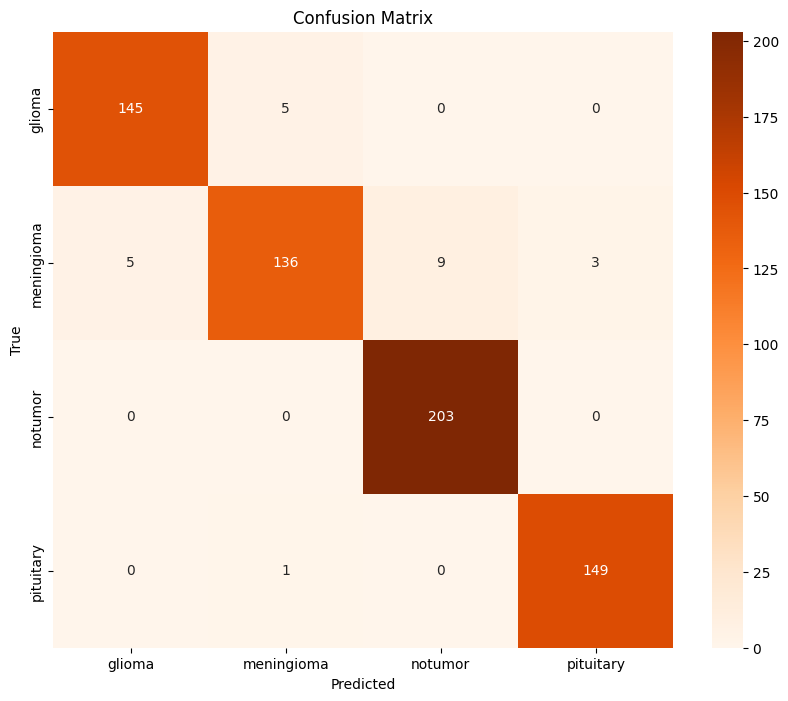

              precision    recall  f1-score   support

      glioma       0.97      0.97      0.97       150
  meningioma       0.96      0.89      0.92       153
     notumor       0.96      1.00      0.98       203
   pituitary       0.98      0.99      0.99       150

    accuracy                           0.96       656
   macro avg       0.97      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



In [ ]:
# Predict on the test set
test_predictions = trained_model.predict(test_data_gen_flow)
predicted_classes = np.argmax(test_predictions, axis=1)
true_classes = test_data_gen_flow.classes

# Function to plot the confusion matrix with updated names and a different color map
def display_confusion_matrix(actual_classes, predicted_classes, labels, cmap='Oranges'):
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(actual_classes, predicted_classes)

    # Set up the plot
    plt.figure(figsize=(10, 8))

    # Create a heatmap with the specified colormap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap,
                xticklabels=labels, yticklabels=labels)

    # Label the plot
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

    # Show the plot
    plt.show()

# Get the class names from the test generator's class indices
class_labels = list(test_data_gen_flow.class_indices.keys())

# Plot the confusion matrix with updated variable names and color map
display_confusion_matrix(true_classes, predicted_classes, class_labels, cmap='Oranges')

# Print the classification report with updated variable names
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# ROC Curve for VGG19

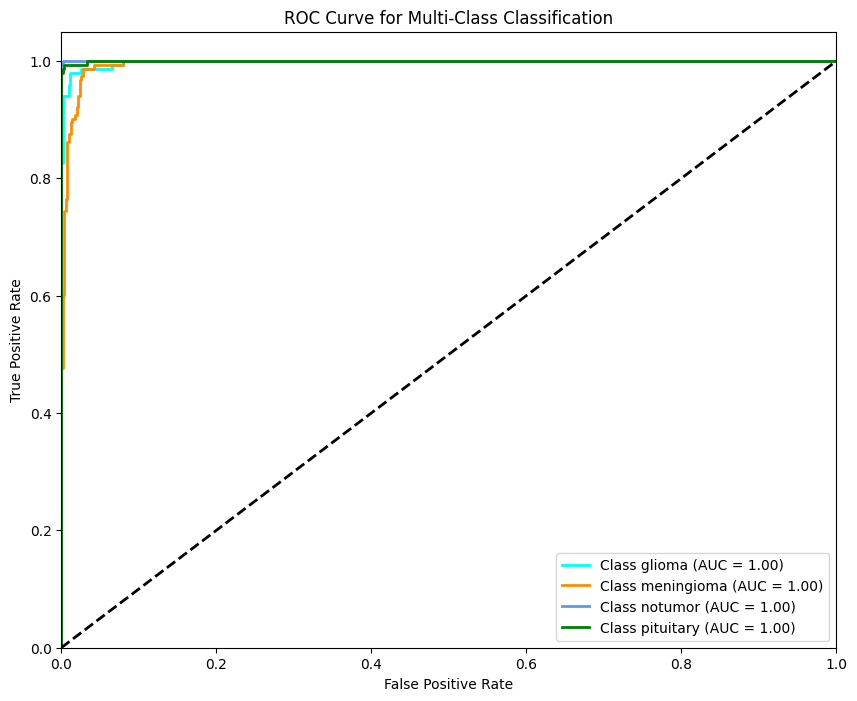

In [ ]:
# Binarize the true classes
n_classes = len(class_labels)
true_classes_binarized = label_binarize(true_classes, classes=[i for i in range(n_classes)])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # Compute FPR and TPR for the i-th class
    fpr[i], tpr[i], _ = roc_curve(true_classes_binarized[:, i], test_predictions[:, i])
    # Calculate the area under the ROC curve (AUC)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (random guess)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Setting the limits and labels of the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

# Saving Models

In [ ]:
trained_model.save('/content/drive/MyDrive/VGG19_Best_Model.h5')